In [106]:
import tensorflow as tf
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt

In [114]:
pwd = os.getcwd()
Models_path = pwd + '/Models'
OcT = 'Ocean1_Ocean4_Ocean3_Ocean2'
Type, Oc, ind = 'COM_NEMO-CNRS', 'Ocean1',0
Data = pd.read_csv(glob.glob(pwd + '/Data/data_' + Oc + '_' + Type + '*')[0])
def retrieve_path(Models_path, Type = 'COM_NEMO-CNRS', Oc = 'Ocean1', ind = 0):
    path = '/'.join([Models_path, Type, Oc]) + '/'
    Tot = glob.glob(path + '*')[ind]
    return Tot

In [115]:
path = retrieve_path(Models_path, Type, OcT, ind)
Model = tf.keras.models.load_model(path + '/' + 'model.h5')
MeanX = pd.read_pickle(path + '/' + 'MeanX.pkl')
StdX = pd.read_pickle(path + '/' + 'StdX.pkl')
MaxY = np.loadtxt(path + '/' + 'MaxY.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/bouissob/Script/Models/COM_NEMO-CNRS/Ocean1_Ocean4_Ocean3_Ocean2/Ep_4_Input_5_1645201577.8782346/MeanX.pkl'

In [103]:
Data_clean = Data_Tot.loc[~Data_Tot.thermalDriving.isna() & ~Data_Tot.meltRate.isna() 
                          & ~Data_Tot.halineDriving.isna() & ~Data_Tot.iceDraft.isna()]

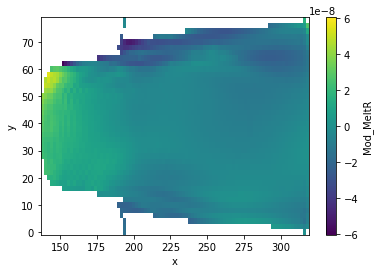

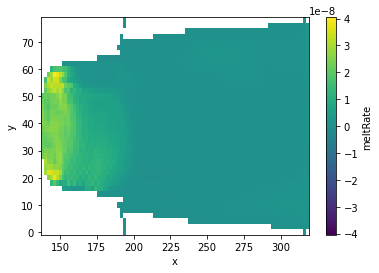

In [105]:
Var_names_X = ['thermalDriving', 'x', 'y', 'iceDraft', 'halineDriving']
Data = Data_clean.loc[Data_clean.date == 20].reset_index(drop = True)
X = Data[Var_names_X]
X_N = np.array((X - MeanX)/StdX)
X_N = np.array(X_N).reshape(-1, 5, )

Y_mod = Model(X_N)*maxY
#Data['Mod_MeltR'] = Y_mod.numpy().reshape(len(Y_mod), )
Data['Mod_MeltR'] = np.array(Y_mod)
Data = Data.set_index(['y', 'x'])
Dataset = Data.to_xarray()
Dataset.Mod_MeltR.plot(cmap = plt.get_cmap('viridis'))
plt.figure()
Dataset.meltRate.plot(cmap = plt.get_cmap('viridis'))

In [111]:
Model.history

TypeError: 'NoneType' object is not callable